In [ ]:
%pip install opencv-python -q
%pip install matplotlib -q
%pip install numpy -q

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

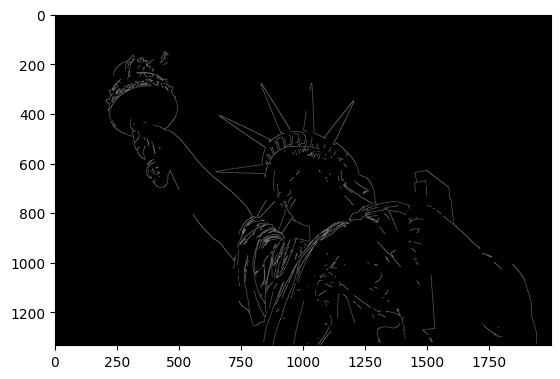

In [55]:
img = cv2.imread("images/statue_of_liberty.jpeg", 0)
canny_img = cv2.Canny(img, 200, 300)
plt.imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB))
plt.show()
None

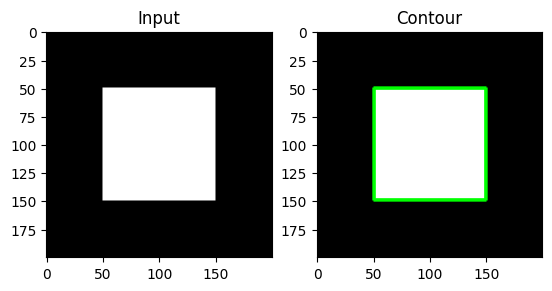

In [56]:
# Contour detection

f, axarr = plt.subplots(1, 2)

# 200x200 black image
img = np.zeros((200, 200), dtype=np.uint8)

img[50:150, 50:150] = 255 # centered white square
ret, thresh = cv2.threshold(img, 127, 255, 0)

axarr[0].set_title('Input')
axarr[0].imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR))

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)
axarr[1].imshow(img)
axarr[1].set_title('Contour')

plt.show()
None

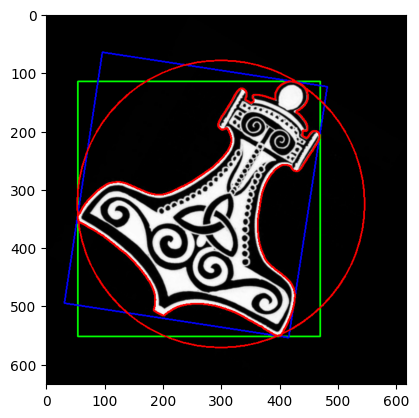

In [57]:
img = cv2.pyrDown(cv2.imread("images/hammer.jpg", cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)    
    box = cv2.boxPoints(rect) # calculate coordinates of the minimum area rectangle   
    box = np.int0(box)  # normalize coordinates to integers
    cv2.drawContours(img, [box], 0, (0,0, 255), 2)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (255, 0, 0), 2)

    
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)
None

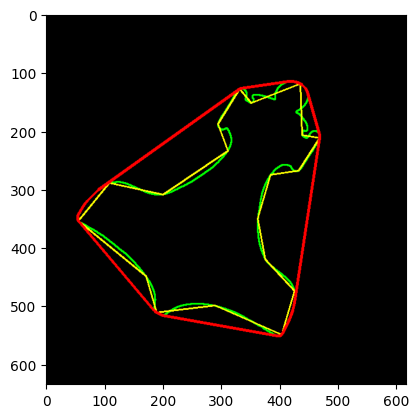

In [58]:
img = cv2.pyrDown(cv2.imread("images/hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)
for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (255, 0, 0), 3)
plt.imshow(black)
None